In [1]:
import pandas as pd

import sys
import os

sys.path.append(os.path.abspath("../src"))

from architecture_generator import create_model_from_row
import data_preprocessing as dp

In [2]:
exp_id = '54_13'

In [3]:
oracle_path = f'../experiments/ebe_vs/oracle'
oracle_df = pd.read_csv(f'{oracle_path}/{exp_id}_Oracle_all.csv')
oracle_df.head()

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,var_val_acc,gap_val_acc,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_time,es_lc,es_test_loss,es_test_acc
0,4,32,"[54, 108]",1,[0.1],"[472, 446, 437, 416, 411, 403, 296, 249, 160, ...",hourglass,31,<class 'torch.nn.modules.activation.ELU'>,0.2,...,NaN,NaN,0.475082,0.502412,0.725926,0.757353,43.135125,"{'es_train_losses': [5.894125965789512, 1.4669...",0.675230,0.705882
1,1,256,"[54, 108]",1,[0.1],"[260, 175, 311, 4, 199, 405, 246, 479, 300, 28...",irregular,24,<class 'torch.nn.modules.activation.LeakyReLU'>,0.1,...,NaN,NaN,1.384578,1.382597,0.270370,0.330882,3.291841,"{'es_train_losses': [4.556849747233921, 1.3857...",1.389135,0.241176
2,3,128,"[54, 108]",1,[0.1],"[37, 59, 76, 94, 96, 112, 119, 176, 217, 231, ...",inv_pyramid,31,<class 'torch.nn.modules.activation.Sigmoid'>,0.5,...,NaN,NaN,16074.264699,1.394828,0.235185,0.250000,6.162019,"{'es_train_losses': [16074.264699074074, 4026....",1.397063,0.247059
3,5,1024,"[54, 108]",1,[0.1],"[3, 19, 25, 33, 51, 99, 120, 156, 162, 211, 22...",inv_pyramid,36,<class 'torch.nn.modules.activation.ELU'>,0.1,...,NaN,NaN,1.370795,1.302735,0.274074,0.301471,3.086054,"{'es_train_losses': [1.3848339319229126, 1.384...",1.359685,0.241176
4,0,512,"[54, 108]",1,[0.1],"[498, 497, 473, 427, 404, 301, 264, 251, 247, ...",hourglass,26,<class 'torch.nn.modules.activation.LeakyReLU'>,0.4,...,NaN,NaN,590.743541,4.323606,0.227778,0.213235,2.343542,"{'es_train_losses': [590.7435406720197, 9358.6...",3.686670,0.276471


In [4]:
oracle_df.sort_values(by='es_test_acc', ascending=False)

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,var_val_acc,gap_val_acc,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_time,es_lc,es_test_loss,es_test_acc
743,754,64,"[54, 108, 216, 432]",3,"[0.1, 0.4, 1.2000000000000002]","[488, 235, 75, 407, 64]",mutated,4,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.001117,0.066176,0.052568,0.856341,0.979630,0.830882,5.160551,"{'es_train_losses': [1.349006391454626, 1.1453...",0.764530,0.823529
678,678,64,"[54, 108, 216, 432]",3,"[0.1, 0.4, 1.2000000000000002]","[317, 310, 75, 303, 457]",mutated,5,<class 'torch.nn.modules.activation.ELU'>,0.3,...,0.002535,0.047794,0.048528,0.850326,0.981481,0.816176,6.734803,"{'es_train_losses': [1.3659153434965345, 1.266...",0.757558,0.823529
712,728,128,"[54, 108, 216]",2,"[0.1, 0.4]","[80, 154, 280, 303, 457]",triangular,5,<class 'torch.nn.modules.activation.ELU'>,0.3,...,NaN,NaN,0.299288,0.403195,0.868519,0.845588,9.265780,"{'es_train_losses': [1.3836308514630353, 1.351...",0.422989,0.817647
779,764,32,"[54, 108, 216]",2,"[0.1, 0.4]","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]",constant,12,<class 'torch.nn.modules.activation.ELU'>,0.2,...,NaN,NaN,0.113002,1.299426,0.959259,0.830882,41.471710,"{'es_train_losses': [5.60731444005613, 2.21043...",0.775642,0.817647
739,724,32,"[54, 108, 216]",2,"[0.1, 0.4]","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]",constant,12,<class 'torch.nn.modules.activation.ELU'>,0.2,...,NaN,NaN,0.113002,1.299426,0.959259,0.830882,42.072913,"{'es_train_losses': [5.60731444005613, 2.21043...",0.775642,0.817647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,29,64,"[54, 108, 216, 432]",3,"[0.1, 0.4, 1.2000000000000002]","[31, 210, 107, 323, 391, 129, 219, 162, 328, 4...",irregular,23,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.000949,-0.062500,1.386274,1.385622,0.250000,0.235294,7.575063,"{'es_train_losses': [1.3871835770430387, 1.386...",1.386980,0.217647
7,6,512,"[54, 108, 216]",2,"[0.1, 0.4]","[488, 477, 473, 461, 454, 433, 430, 412, 402, ...",pyramid,45,<class 'torch.nn.modules.activation.ELU'>,0.5,...,NaN,NaN,1.435276,1.423987,0.272222,0.235294,3.689785,"{'es_train_losses': [1.4352757356784962, 1.420...",1.414535,0.217647
877,799,128,"[54, 108, 216, 432]",3,"[0.1, 0.4, 1.2000000000000002]","[8, 32, 34, 41, 142, 158, 159, 169, 179, 180, ...",mutated,38,<class 'torch.nn.modules.activation.Tanh'>,0.1,...,0.000084,0.003676,1.388079,1.390807,0.242593,0.235294,6.928824,"{'es_train_losses': [1.388079243236118, 1.3858...",1.389415,0.217647
6,14,32,"[54, 108, 216]",2,"[0.1, 0.4]","[491, 466, 456, 455, 436, 424, 410, 410, 407, ...",pyramid,31,<class 'torch.nn.modules.activation.Tanh'>,0.0,...,NaN,NaN,1.384745,1.390957,0.238889,0.235294,25.061235,"{'es_train_losses': [1.4282744584260163, 1.423...",1.389376,0.217647


In [5]:
oracle_df[oracle_df['id'] == 822]

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,var_val_acc,gap_val_acc,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_time,es_lc,es_test_loss,es_test_acc
797,822,64,"[54, 108, 216]",2,"[0.1, 0.4]","[19, 52, 410, 147, 48]",mutated,24,<class 'torch.nn.modules.activation.ELU'>,0.1,...,NaN,NaN,0.112402,0.733758,0.959259,0.823529,11.264148,"{'es_train_losses': [1.3550045922950462, 1.253...",0.643375,0.770588


In [6]:
oracle_df['val_acc'].max()

'[0.5294117647058824, 0.4411764705882353, 0.5808823529411765]'

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = dp.get_preprocessed_data(
        dataset_id=54,
        scaling=True,
        random_seed=13,
        return_as='tensor',
        task_type='classification'
        )

input_size, output_size = dp.get_tensor_sizes(X_train, y_train)

Loading Dataset: vehicle
Class column is not numeric. Applying LabelEncoder.
Data loaded successfully! Format: tensor
Training data shape: torch.Size([540, 18])
y_training data shape: torch.Size([540])


In [ ]:
# # Train the model
# final_train_loss, final_train_acc, final_val_loss, final_val_acc, lc = model.es_train(train_loader=train_loader, val_loader=val_loader,
#                 es_patience=100, # epochs without improvement
#                 max_epochs=1000, # cap for epochs
#                 verbose=False, # print training progress
#                 return_lc=True
# )


NameError: name 'train_loader' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
lc.keys()

dict_keys(['es_train_losses', 'es_val_losses', 'es_train_accs', 'es_val_accs'])

In [10]:
import ast
ebe_path = f'../experiments/ebe_vs/ebe-models'
ebe_history = pd.read_csv(f'{ebe_path}/{exp_id}_EBE-history.csv')
# ebe_history['train_loss'] = ebe_history['train_loss'].apply(ast.literal_eval)
# ebe_history['val_loss'] = ebe_history['val_loss'].apply(ast.literal_eval)
# ebe_history['train_acc'] = ebe_history['train_acc'].apply(ast.literal_eval)
# ebe_history['val_acc'] = ebe_history['val_acc'].apply(ast.literal_eval)
ebe_history.head()

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,score,forecast_gain,fcst_greater_than_baseline,last_train_acc,last_train_loss,last_val_acc,last_val_loss,slope_val_acc,var_val_acc,gap_val_acc
0,4,32,"[54, 108]",1,[0.1],"[472, 446, 437, 416, 411, 403, 296, 249, 160, ...",hourglass,31,<class 'torch.nn.modules.activation.ELU'>,0.2,...,0.279412,0.0,False,0.259259,16.472794,0.279412,2.302993,NaN,NaN,NaN
1,1,256,"[54, 108]",1,[0.1],"[260, 175, 311, 4, 199, 405, 246, 479, 300, 28...",irregular,24,<class 'torch.nn.modules.activation.LeakyReLU'>,0.1,...,0.235294,0.0,False,0.277778,2.106540,0.235294,1.430094,NaN,NaN,NaN
2,3,128,"[54, 108]",1,[0.1],"[37, 59, 76, 94, 96, 112, 119, 176, 217, 231, ...",inv_pyramid,31,<class 'torch.nn.modules.activation.Sigmoid'>,0.5,...,0.220588,0.0,False,0.259259,1.469555,0.220588,3.888627,NaN,NaN,NaN
3,5,1024,"[54, 108]",1,[0.1],"[3, 19, 25, 33, 51, 99, 120, 156, 162, 211, 22...",inv_pyramid,36,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.213235,0.0,False,0.185185,1.401521,0.213235,1.373393,NaN,NaN,NaN
4,0,512,"[54, 108]",1,[0.1],"[498, 497, 473, 427, 404, 301, 264, 251, 247, ...",hourglass,26,<class 'torch.nn.modules.activation.LeakyReLU'>,0.4,...,0.213235,0.0,False,0.240741,829.190247,0.213235,6.699797,NaN,NaN,NaN


In [11]:
ebe_scoreboard = pd.read_csv(f'{ebe_path}/{exp_id}_ES_EBE.csv')
display(ebe_scoreboard.sort_values('es_test_acc', ascending=False).head(1))
oracle_df[oracle_df['id'] == 822]

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_train_losses,es_val_losses,es_train_accs,es_val_accs,es_test_loss,es_test_acc
17,822,64,"[54, 108, 216]",2,"[0.1, 0.4]","[19, 52, 410, 147, 48]",mutated,24,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.160654,0.431449,0.937037,0.830882,"[1.21142433307789, 1.0216042673146284, 0.87291...","[1.1336503449608297, 0.914660699227277, 0.8156...","[0.45740740740740743, 0.5425925925925926, 0.62...","[0.5073529411764706, 0.6617647058823529, 0.610...",0.382982,0.841176


,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,var_val_acc,gap_val_acc,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_time,es_lc,es_test_loss,es_test_acc
797,822,64,"[54, 108, 216]",2,"[0.1, 0.4]","[19, 52, 410, 147, 48]",mutated,24,<class 'torch.nn.modules.activation.ELU'>,0.1,...,NaN,NaN,0.112402,0.733758,0.959259,0.823529,11.264148,"{'es_train_losses': [1.3550045922950462, 1.253...",0.643375,0.770588


(0.0, 3.0)

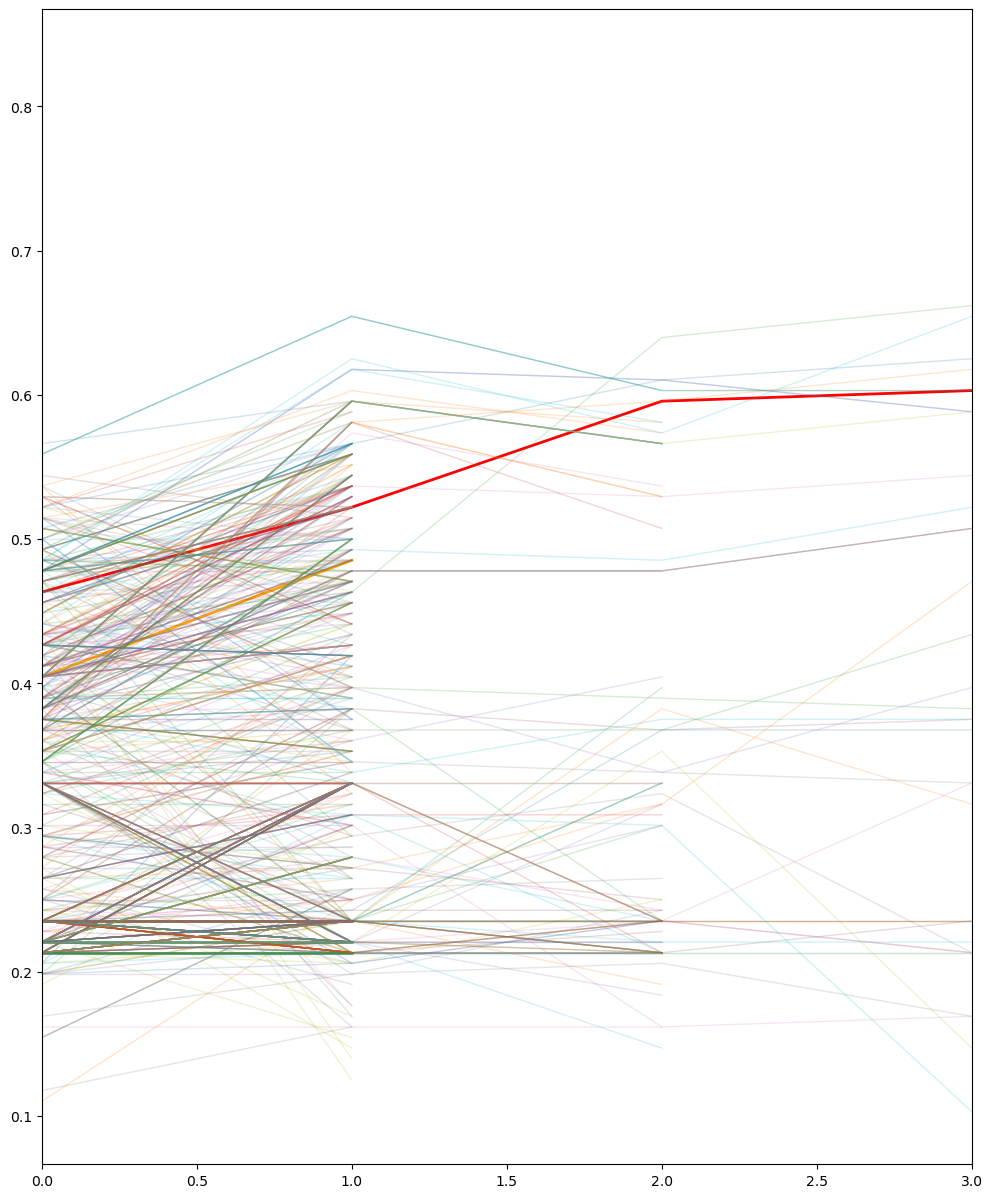

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 15))
# Plot individual learning curves
for i in range(len(ebe_history)):
    series = ast.literal_eval(ebe_history['val_acc'].iloc[i])
    
    if i == 275:
        ax.plot(val_accs, alpha=1.0, linewidth=2, c='red')
        ax.plot(series, alpha=1.0, linewidth=2, c='orange')
    else:
        ax.plot(series, alpha=0.2, linewidth=1)

ax.set_xlim(0,3)

In [ ]:
type(ebe_history['val_acc'].iloc[i])

str

In [ ]:
oracle_model = 1

In [24]:
oracle_model = create_model_from_row(oracle_df.loc[797], input_size, output_size)

from utils import set_seed

batch_size = int(oracle_df.loc[797, 'batch_size']) # batch size for training the model
model_seed = int(oracle_df.loc[797, 'arch_seed']) # seed for training the model
print(batch_size)
print(model_seed)

g, seed_worker = set_seed(model_seed)

train_loader = dp.create_dataloader(X=X_train, y=y_train, 
                       batch_size=batch_size, generator=g, seed_worker=seed_worker)
val_loader = dp.create_dataloader(X=X_val, y=y_val, 
                       batch_size=batch_size, generator=g, seed_worker=seed_worker)
test_loader = dp.create_dataloader(X=X_test, y=y_test, 
                       batch_size=batch_size, generator=g, seed_worker=seed_worker)

# Train the model
final_train_loss, final_train_acc, final_val_loss, final_val_acc, lc = oracle_model.es_train(train_loader=train_loader, val_loader=val_loader,
                es_patience=100, # epochs without improvement
                max_epochs=1000, # cap for epochs
                verbose=True, # print training progress
                return_lc=True
)
print(final_train_loss, final_train_acc, final_val_loss, final_val_acc)

# train_loss, train_acc = oracle_model.oe_train(train_loader, num_epochs=100)
# print(train_loss, train_acc)

64
4326444
New best acc found: 0.5000
Epoch 1: Train Loss=1.3737, Train Acc=0.2833, Val Loss=1.3227, Val Acc=0.5000
New best acc found: 0.5588
Epoch 2: Train Loss=1.2837, Train Acc=0.4833, Val Loss=1.2260, Val Acc=0.5588
Epoch 3: Train Loss=1.1736, Train Acc=0.5426, Val Loss=1.1121, Val Acc=0.5294
New best acc found: 0.5882
Epoch 4: Train Loss=1.0591, Train Acc=0.5759, Val Loss=0.9871, Val Acc=0.5882
New best acc found: 0.5956
Epoch 5: Train Loss=0.9441, Train Acc=0.6111, Val Loss=0.9247, Val Acc=0.5956
New best acc found: 0.6176
Epoch 6: Train Loss=0.8979, Train Acc=0.6130, Val Loss=0.8453, Val Acc=0.6176
New best acc found: 0.6397
Epoch 7: Train Loss=0.8562, Train Acc=0.6296, Val Loss=0.8191, Val Acc=0.6397
Epoch 8: Train Loss=0.7763, Train Acc=0.6611, Val Loss=0.7750, Val Acc=0.6397
New best acc found: 0.6544
Epoch 9: Train Loss=0.7699, Train Acc=0.6630, Val Loss=0.7866, Val Acc=0.6544
Epoch 10: Train Loss=0.7040, Train Acc=0.7056, Val Loss=0.7432, Val Acc=0.6471
New best acc found: